In [16]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns

import pytelligence as pt

%load_ext autoreload
%autoreload 2

pd.options.display.max_columns = 2000

sns.set_theme()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
df = pd.read_csv(
    "../data/breast_cancer_cat/breast-cancer.data",
    names=[
        "class",
        "age",
        "menopause",
        "tumor-size",
        "inv-nodes",
        "node-caps",
        "deg-malig",
        "breast",
        "breast-quad",
        "irradiat",
    ],
)
df.head()

class    age menopause tumor-size inv-nodes node-caps  \
0  no-recurrence-events  30-39   premeno      30-34       0-2        no   
1  no-recurrence-events  40-49   premeno      20-24       0-2        no   
2  no-recurrence-events  40-49   premeno      20-24       0-2        no   
3  no-recurrence-events  60-69      ge40      15-19       0-2        no   
4  no-recurrence-events  40-49   premeno        0-4       0-2        no   

   deg-malig breast breast-quad irradiat  
0          3   left    left_low       no  
1          2  right    right_up       no  
2          2   left    left_low       no  
3          2  right     left_up       no  
4          2  right   right_low       no

In [18]:
# pt.feat_analysis.get_distribution(df)

In [19]:
# sns.jointplot(data=df, x="deg-malig", y="breast", hue="class")

## Training

In [20]:
df.columns

Index(['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object')

In [21]:
setup, X_sample, y_sample = pt.modelling.prepare_data(
    train_data=df,
    config_path="./config_bc_cat.yml",
)

[I 2022-12-14 14:31:02] %%% PREPARING DATA
[I 2022-12-14 14:31:02] Read ./config_bc_cat.yml: 
 {'modelling': {'target_clf': 'class', 'numeric_cols': ['deg-malig'], 'categorical_cols': ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat'], 'feature_scaling': True}}
[I 2022-12-14 14:31:02] Created preprocessing pipeline with following steps: ['scaler', 'ohe']
/home/george/Desktop/pytelligence/pytelligence/modelling/_internals/_prep_pipeline.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2022-12-14 14:31:02] Applied preprocessing transformations
[I 2022-12-14 14:31:02] Encoded target variable using classes: [(0, 'no-recurrence-events'), (1, 'recurrence-events')]


In [22]:
X_sample

deg-malig  age_20-29  age_30-39  age_40-49  age_50-59  age_60-69  \
0   1.290564          0          1          0          0          0   
1  -0.066426          0          0          1          0          0   
2  -0.066426          0          0          1          0          0   
3  -0.066426          0          0          0          0          1   
4  -0.066426          0          0          1          0          0   

   age_70-79  menopause_ge40  menopause_lt40  menopause_premeno  \
0          0               0               0                  1   
1          0               0               0                  1   
2          0               0               0                  1   
3          0               1               0                  0   
4          0               0               0                  1   

   tumor-size_0-4  tumor-size_10-14  tumor-size_15-19  tumor-size_20-24  \
0               0                 0                 0                 0   
1               0                 0                 0                 1   
2               0                 0                 0                 1   
3               0                 0                 1                 0   
4               1                 0                 0                 0   

   tumor-size_25-29  tumor-size_30-34  tumor-size_35-39  tumor-size_40-44  \
0                 0                 1                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   tumor-size_45-49  tumor-size_5-9  tumor-size_50-54  inv-nodes_0-2  \
0                 0               0                 0              1   
1                 0               0                 0              1   
2                 0               0                 0              1   
3                 0               0                 0              1   
4                 0               0                 0              1   

   inv-nodes_12-14  inv-nodes_15-17  inv-nodes_24-26  inv-nodes_3-5  \
0                0                0                0              0   
1                0                0                0              0   
2                0                0                0              0   
3                0                0                0              0   
4                0                0                0              0   

   inv-nodes_6-8  inv-nodes_9-11  node-caps_?  node-caps_no  node-caps_yes  \
0              0               0            0             1              0   
1              0               0            0             1              0   
2              0               0            0             1              0   
3              0               0            0             1              0   
4              0               0            0             1              0   

   breast_left  breast_right  breast-quad_?  breast-quad_central  \
0            1             0              0                    0   
1            0             1              0                    0   
2            1             0              0                    0   
3            0             1              0                    0   
4            0             1              0                    0   

   breast-quad_left_low  breast-quad_left_up  breast-quad_right_low  \
0                     1                    0                      0   
1                     0                    0                      0   
2                     1                    0                      0   
3                     0                    1                      0   
4                     0                    0                      1   

   breast-quad_right_up  irradiat_no  irradiat_yes  
0                     0            1     

In [23]:
compare_df, algo_list, model_list = pt.modelling.compare_algorithms(
    setup=setup,
    include=[
        "lr",
        # "dt",
        # "rf",
        # "ridge",
        # "perceptron",
        # "passive-aggressive",
        # "extratree",
        # "extratrees",
        # "knn",
        "nb",
        # "linearsvc",
        # "rbfsvc",
    ],
    sort="f1",
    return_models=True,
)
compare_df

[I 2022-12-14 14:31:03] %%% COMPARING ALGORITHMS
[I 2022-12-14 14:31:03] Evaluating lr...
[I 2022-12-14 14:31:11] Evaluating nb...


algorithm  accuracy  precision  recall     f1  roc_auc  Fit time (s)
0        nb     0.553      0.448   0.835  0.553    0.659         0.027
1        lr     0.682      0.532   0.341  0.345    0.654         0.064

In [9]:
compare_df_tune, model_list, opt_history_dict = (
        pt.modelling.tune_hyperparams(
               setup=setup,
               include=["lr", "nb"],
               optimize="f1",
               n_trials=10,
               return_models=True,
        )
)
compare_df_tune

[I 2022-12-14 12:11:25] %%% TUNING HYPERPARAMETERS
[I 2022-12-14 12:11:25] Algorithms: ['lr', 'nb']
[I 2022-12-14 12:11:25] Metric: f1
[I 2022-12-14 12:11:25] Trials per algorithm: 10
[I 2022-12-14 12:11:26] Trial 0 finished with value: 0.3980 and parameters: {'C': 2.5547127639132974, 'l1_ratio': 0.18122598224245623}. Best is trial 0 with value: 0.3980
[I 2022-12-14 12:11:26] Trial 1 finished with value: 0.0000 and parameters: {'C': 6.874365920822166e-06, 'l1_ratio': 0.8185499707099628}. Best is trial 0 with value: 0.3980
[I 2022-12-14 12:11:26] Trial 2 finished with value: 0.0000 and parameters: {'C': 1.5437356692517823e-06, 'l1_ratio': 0.11241698624104624}. Best is trial 0 with value: 0.3980
[I 2022-12-14 12:11:26] Trial 3 finished with value: 0.2215 and parameters: {'C': 0.08470498624555314, 'l1_ratio': 0.21947092717650785}. Best is trial 0 with value: 0.3980
[I 2022-12-14 12:11:27] Trial 4 finished with value: 0.3687 and parameters: {'C': 33.55746768009662, 'l1_ratio': 0.6361946182

algorithm  accuracy  precision  recall     f1  roc_auc  Fit time (s)  \
0        nb     0.619      0.493   0.788  0.578    0.656         0.010   
1        lr     0.671      0.579   0.376  0.398    0.617         0.122   

                                         hyperparams  
0  {'priors': None, 'var_smoothing': 3.7361283315...  
1  {'C': 2.5547127639132974, 'class_weight': None...

In [10]:
opt_history_dict["nb"].show()

[I 2022-12-14 12:04:18] %%% REDUCING FEATURE SPACE
[I 2022-12-14 12:04:18] Algorithm selected for feature space reduction: nb
[I 2022-12-14 12:04:18] Metric to optimize for: f1
[I 2022-12-14 12:04:18] Acceptable loss ratio: 0.99
[I 2022-12-14 12:04:18] Reference metric: 0.560
[I 2022-12-14 12:04:18] Minimum acceptable metric: 0.99 * 0.560 = 0.554
[I 2022-12-14 12:04:23] Feature count: 40, metric: 0.571 (new best), removing worst feature: breast-quad_right_up
[I 2022-12-14 12:04:27] Feature count: 39, metric: 0.578 (new best), removing worst feature: tumor-size_40-44
[I 2022-12-14 12:04:31] Feature count: 38, metric: 0.582 (new best), removing worst feature: breast-quad_central
[I 2022-12-14 12:04:36] Feature count: 37, metric: 0.590 (new best), removing worst feature: tumor-size_15-19
[I 2022-12-14 12:04:40] Feature count: 36, metric: 0.592 (new best), removing worst feature: age_40-49
[I 2022-12-14 12:04:44] Feature count: 35, metric: 0.592, removing worst feature: age_60-69
[I 2022-1

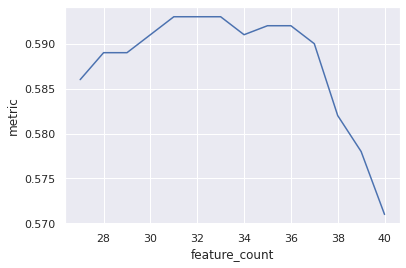

In [11]:
best_feature_list, metric_feature_df = pt.modelling.reduce_feature_space(
    setup=setup,
    algorithm= "nb",
    metric="f1",
    reference_metric=compare_df_tune.iloc[0]["f1"],
    acceptable_loss=0.99,
    hyperparams=compare_df_tune.iloc[0]["hyperparams"]
)

In [12]:
compare_df_final, model_list, opt_history_dict = (
        pt.modelling.tune_hyperparams(
               setup=setup,
               include=["nb", "lr"],
               optimize="f1",
               n_trials=20,
               feature_list=best_feature_list,
               return_models=True,
        )
)
compare_df_final

[I 2022-12-14 12:05:22] %%% TUNING HYPERPARAMETERS
[I 2022-12-14 12:05:22] Algorithms: ['nb', 'lr']
[I 2022-12-14 12:05:22] Metric: f1
[I 2022-12-14 12:05:22] Trials per algorithm: 20
[I 2022-12-14 12:05:22] Trial 0 finished with value: 0.5818 and parameters: {'var_smoothing': 3.1682537232046905e-07}. Best is trial 0 with value: 0.5818
[I 2022-12-14 12:05:22] Trial 1 finished with value: 0.4588 and parameters: {'var_smoothing': 0.00010163121952395116}. Best is trial 0 with value: 0.5818
[I 2022-12-14 12:05:23] Trial 2 finished with value: 0.5633 and parameters: {'var_smoothing': 2.0414889699491233e-05}. Best is trial 0 with value: 0.5818
[I 2022-12-14 12:05:23] Trial 3 finished with value: 0.5651 and parameters: {'var_smoothing': 1.5411609542350935e-05}. Best is trial 0 with value: 0.5818
[I 2022-12-14 12:05:23] Trial 4 finished with value: 0.5780 and parameters: {'var_smoothing': 4.0833261251023534e-08}. Best is trial 0 with value: 0.5818
[I 2022-12-14 12:05:23] Trial 5 finished with 

algorithm  accuracy  precision  recall     f1  roc_auc  Fit time (s)  \
0        nb     0.599      0.501   0.859  0.593    0.658         0.020   
1        lr     0.682      0.545   0.329  0.352    0.627         0.153   

                                         hyperparams  
0  {'priors': None, 'var_smoothing': 1.3989258947...  
1  {'C': 3.9047401417868413, 'class_weight': None...

In [13]:
setup.prep_pipe

Pipeline(steps=[('scaler', CustomStandardScaler(numeric_cols=['deg-malig'])),
                ('ohe', OHE())])

In [14]:
pt.modelling.export_model(
        setup=setup,
        model=model_list[0],
        target_dir="./",
    )

[I 2022-12-14 12:06:05] Exported modelling pipeline to 'model_2022-12-14_nb_#1.joblib'
